In [56]:
%pip install -q seaborn
%pip install -user -upgrade tensorflow

import pathlib

import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\Users\Bielt\AppData\Local\Programs\Python\Python38\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\Users\Bielt\AppData\Local\Programs\Python\Python38\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\Users\Bielt\AppData\Local\Programs\Python\Python38\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\Users\Bielt\AppData\Local\Programs\Python\Python38\python.exe -m pip install [options] [-e] <local project path> ...
  C:\Users\Bielt\AppData\Local\Programs\Python\Python38\python.exe -m pip install [options] <archive url/path> ...

no such option: -u


In [26]:
#TODO: Complete os espaços em branco com uma solução possível para o problema.
n = int(input())
for i in range(n):
    x, y = input().split()
    teste = 0
    cont = 0
    if len(y)>len(x):
        print("nao encaixa1")
 
    else:
        for j in range(len(y)  ):
            teste -= 1
            print(f'x {x[teste]}')
            print(f'y {y[teste]}')
            if x[teste] == y[teste]:
                cont += 1
                print(f'{x}')
                print(f'{y}')
 
        if    cont==len(y)    :
            print(len(y) )
 
        else:
            print("nao encaixa")

x 4
y 3
x 5
y 4
x 5
y 5
5434554
543
nao encaixa


In [57]:
dataset = keras.utils.get_file("breast-cancer-wisconsin.data","https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data")
dataset

'C:\\Users\\Bielt\\.keras\\datasets\\breast-cancer-wisconsin.data'

In [58]:
column_names = [
    "Sample_code_number",
    "Clump_Thickness",
    "Uniformity_of_Cell_Size",
    "Uniformity_of_Cell_Shape",
    "Marginal_Adhesion",
    "Single_Epithelial_Cell_Size",
    "Bare_Nuclei",
    "Bland_Chromatin",
    "Normal_Nucleoli",
    "Mitoses",
    "type"]
dataset_puro = pd.read_csv(dataset , names=column_names,
na_values="?", comment='\t',sep=",",
skipinitialspace=True)
dataset_copy = dataset_puro.copy()
dataset_copy.head(10)


,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,type
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


In [59]:
dataset_copy.describe()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,type
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [60]:
dataset_copy.isna().sum()

Sample_code_number              0
Clump_Thickness                 0
Uniformity_of_Cell_Size         0
Uniformity_of_Cell_Shape        0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
type                            0
dtype: int64

In [61]:
dataset_copy = dataset_copy.dropna()

In [62]:
for col in dataset_copy.columns:
    print(
        f"col {col}. Qtd valores único:{len(dataset_copy[col].unique()) , dataset_copy[col].unique()}"
    )

col Sample_code_number. Qtd valores único:(630, array([ 1000025,  1002945,  1015425,  1016277,  1017023,  1017122,
        1018099,  1018561,  1033078,  1035283,  1036172,  1041801,
        1043999,  1044572,  1047630,  1048672,  1049815,  1050670,
        1050718,  1054590,  1054593,  1056784,  1059552,  1065726,
        1066373,  1066979,  1067444,  1070935,  1071760,  1072179,
        1074610,  1075123,  1079304,  1080185,  1081791,  1084584,
        1091262,  1099510,  1100524,  1102573,  1103608,  1103722,
        1105257,  1105524,  1106095,  1106829,  1108370,  1108449,
        1110102,  1110503,  1110524,  1111249,  1112209,  1113038,
        1113483,  1113906,  1115282,  1115293,  1116116,  1116132,
        1116192,  1116998,  1117152,  1118039,  1120559,  1121732,
        1121919,  1123061,  1124651,  1125035,  1126417,  1131294,
        1132347,  1133041,  1133136,  1136142,  1137156,  1143978,
        1147044,  1147699,  1147748,  1148278,  1148873,  1152331,
        115554

In [63]:
pct_split = 0.8 

In [64]:
dataset_copy.pop('Sample_code_number')

0      1000025
1      1002945
2      1015425
3      1016277
4      1017023
        ...   
694     776715
695     841769
696     888820
697     897471
698     897471
Name: Sample_code_number, Length: 683, dtype: int64

In [65]:
train_dataset  = dataset_copy.sample(frac=pct_split, random_state=0)

In [66]:
test_dataset  = dataset_copy.drop(train_dataset.index)

In [67]:
dataset_copy.columns

Index(['Clump_Thickness', 'Uniformity_of_Cell_Size',
       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'type'],
      dtype='object')

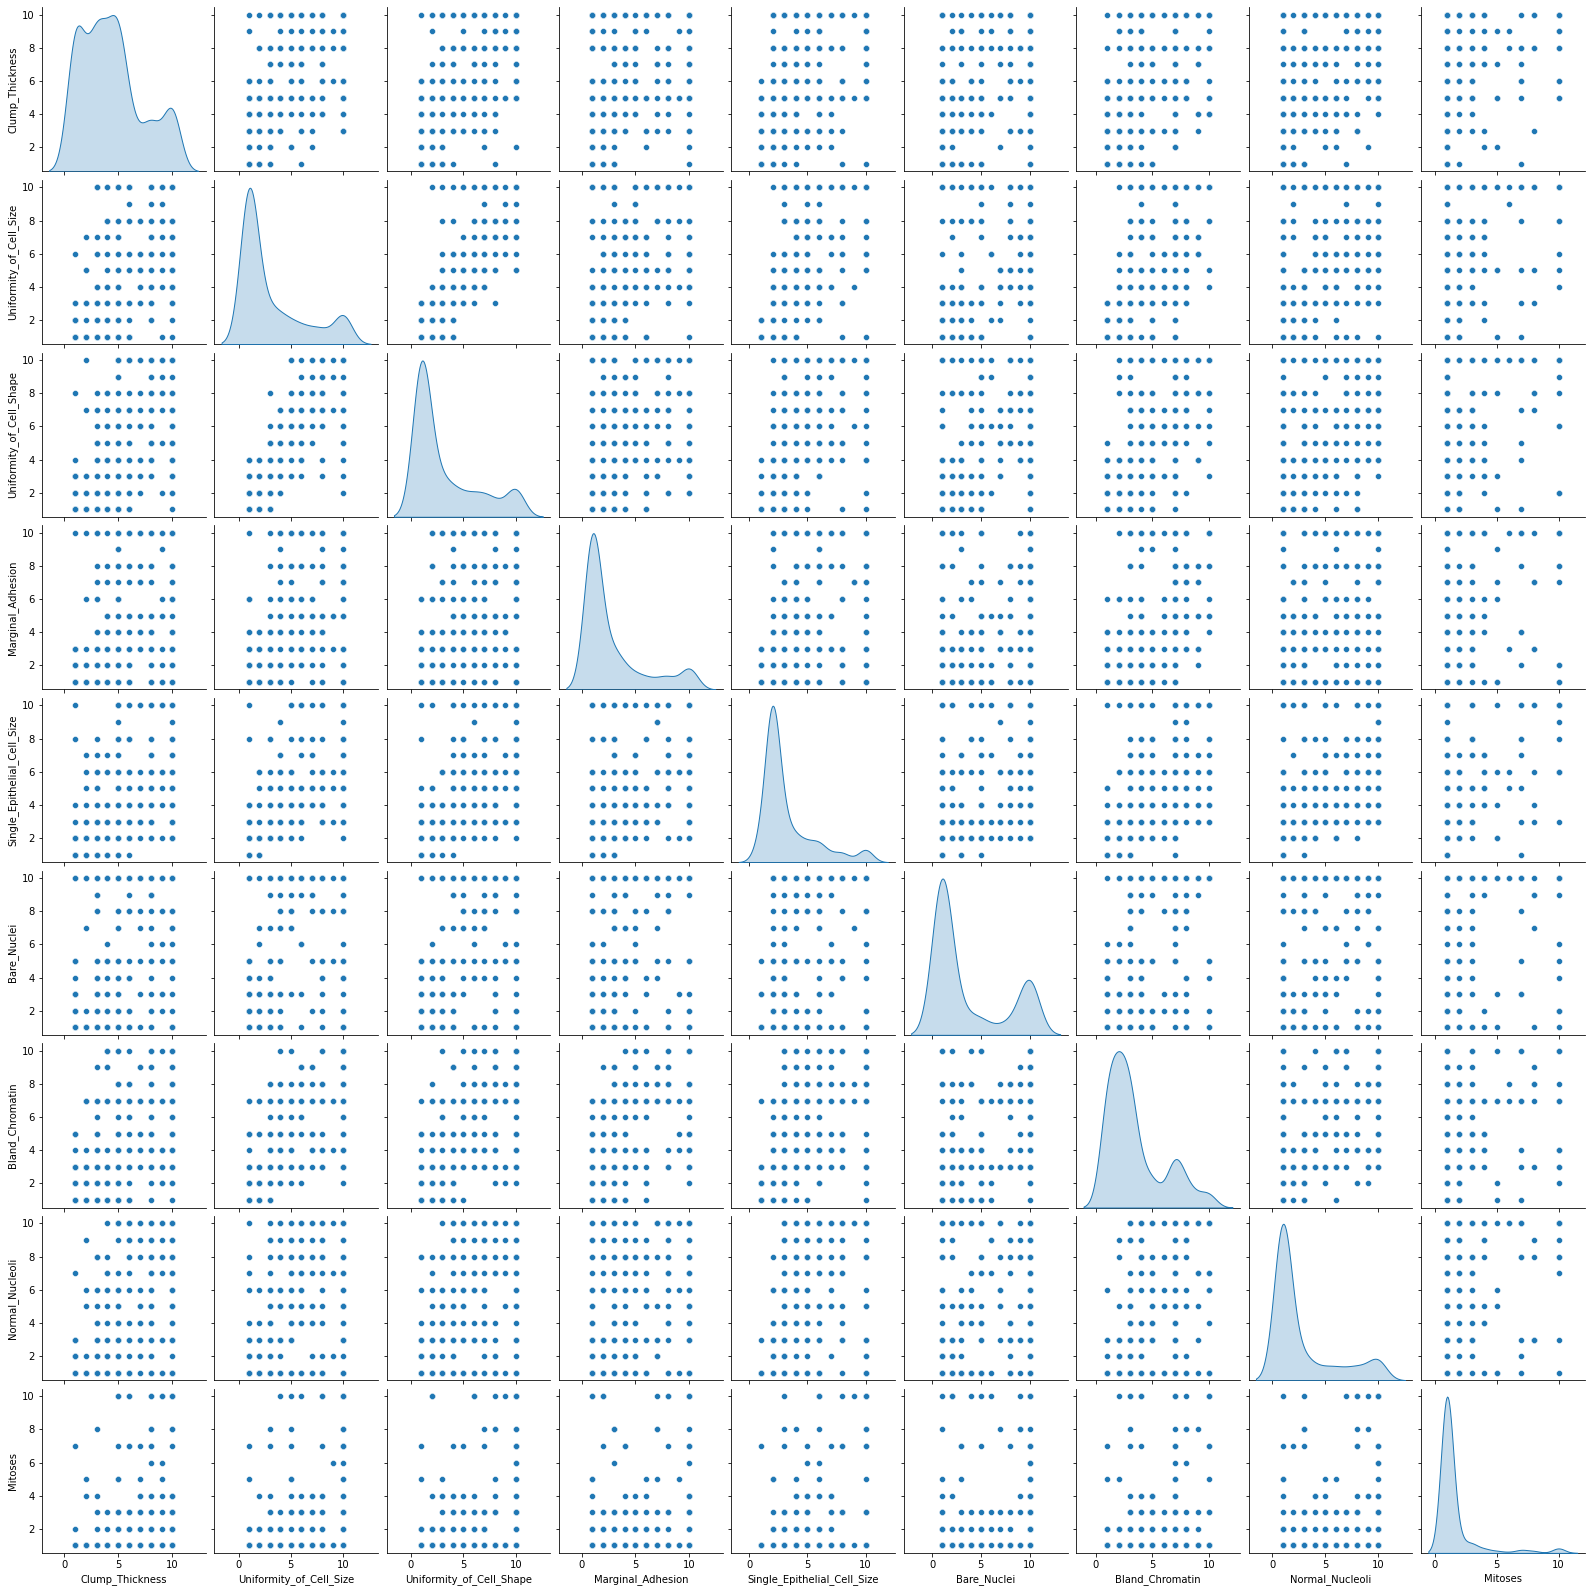

In [68]:
sns.pairplot(train_dataset[[ 'Clump_Thickness', 'Uniformity_of_Cell_Size',
       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses']], diag_kind ="kde")

In [69]:
trains_stats  = train_dataset.describe()

trains_stats.pop('type')
trains_stats = trains_stats.T
trains_stats

,count,mean,std,min,25%,50%,75%,max
Clump_Thickness,546.0,4.388278,2.810754,1.0,2.0,4.0,6.0,10.0
Uniformity_of_Cell_Size,546.0,3.141026,3.083588,1.0,1.0,1.0,5.0,10.0
Uniformity_of_Cell_Shape,546.0,3.212454,3.049246,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,546.0,2.813187,2.846838,1.0,1.0,1.0,3.0,10.0
Single_Epithelial_Cell_Size,546.0,3.223443,2.236782,1.0,2.0,2.0,4.0,10.0
Bare_Nuclei,546.0,3.624542,3.696771,1.0,1.0,1.0,7.0,10.0
Bland_Chromatin,546.0,3.437729,2.467544,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,546.0,2.785714,2.965839,1.0,1.0,1.0,3.0,10.0
Mitoses,546.0,1.615385,1.777139,1.0,1.0,1.0,1.0,10.0


In [70]:
trains_labels =   train_dataset.pop('type')
test_labels   =   test_dataset.pop('type')

In [71]:
def padroniza(x):
    return (x - trains_stats['mean']/trains_stats['std'])

In [72]:
normed_train_data = padroniza(train_dataset)
normed_test_data = padroniza(test_dataset)

In [73]:
normed_train_data

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
115,-0.561246,-0.018627,-0.053524,0.011821,0.558892,4.019538,-0.393178,0.060733,0.091019
392,1.438754,-0.018627,-0.053524,0.011821,0.558892,0.019538,0.606822,0.060733,0.091019
316,3.438754,3.981373,3.946476,1.011821,3.558892,9.019538,2.606822,2.060733,0.091019
519,2.438754,5.981373,6.946476,2.011821,2.558892,9.019538,7.606822,0.060733,0.091019
313,-0.561246,-0.018627,-0.053524,0.011821,0.558892,0.019538,-0.393178,0.060733,0.091019
...,...,...,...,...,...,...,...,...,...
234,1.438754,1.981373,0.946476,0.011821,1.558892,0.019538,1.606822,5.060733,0.091019
460,3.438754,-0.018627,-0.053524,2.011821,0.558892,0.019538,-0.393178,0.060733,0.091019
119,1.438754,0.981373,-0.053524,0.011821,0.558892,1.019538,1.606822,0.060733,0.091019
479,2.438754,6.981373,5.946476,9.011821,2.558892,9.019538,5.606822,4.060733,0.091019


In [74]:
def constroi_modelo():
    model  = keras.Sequential([
        layers.Dense(9, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(10, activation='relu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(
        loss='mse',
        optimizer= optimizer,
        metrics=['mae','mse']
    )
    return model

In [75]:
train_dataset.keys()

Index(['Clump_Thickness', 'Uniformity_of_Cell_Size',
       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses'],
      dtype='object')

In [76]:
model =  constroi_modelo()
model

In [77]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 9)                 90        
                                                                 
 dense_13 (Dense)            (None, 10)                100       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [78]:
exemple_batch = normed_train_data[:10]
exemple_result = model.predict(exemple_batch)
exemple_result

array([[-0.6957419 ],
       [-0.71868676],
       [-4.4995785 ],
       [-4.443462  ],
       [-0.22412819],
       [-0.58018744],
       [-1.6794778 ],
       [-7.416115  ],
       [-0.47616592],
       [-0.3330805 ]], dtype=float32)

In [79]:
class MostraPragresso(keras.callbacks.Callback):
    def on_epoch_end(self,epoch, logs):
        if epoch %100 == 0:
            print('')
        print('-', end='')

In [80]:
EPOCHS =1000

In [81]:
history = model.fit(
    x = normed_train_data,
    y = trains_labels,
    epochs =EPOCHS,
    validation_split = 0.2,
    verbose = 0,
    callbacks = [MostraPragresso()]
)


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------

In [82]:
history.__dict__.keys()

dict_keys(['validation_data', 'model', '_chief_worker_only', '_supports_tf_logs', 'history', 'params', 'epoch'])

In [83]:
history.history.keys()

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])

In [84]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,34.897289,4.890602,34.897289,26.520239,4.425773,26.520239,0
1,19.051376,3.749284,19.051376,14.731745,3.386616,14.731745,1
2,9.926003,2.792917,9.926003,7.608664,2.439529,7.608664,2
3,5.452365,2.066387,5.452365,4.575081,1.889932,4.575081,3
4,3.865716,1.762046,3.865716,3.408162,1.645841,3.408162,4
...,...,...,...,...,...,...,...
995,0.084513,0.157924,0.084513,0.112152,0.197014,0.112152,995
996,0.081755,0.154979,0.081755,0.104544,0.179084,0.104544,996
997,0.083551,0.155026,0.083551,0.103329,0.175299,0.103329,997
998,0.080990,0.151961,0.080990,0.103472,0.173071,0.103472,998


In [85]:
hist.describe()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.196908,0.207393,0.196908,0.197645,0.226735,0.197645,499.500000
std,1.321727,0.249792,1.321727,1.013477,0.222298,1.013477,288.819436
min,0.080990,0.151342,0.080990,0.103329,0.172983,0.103329,0.000000
25%,0.090532,0.161848,0.090532,0.111820,0.186937,0.111820,249.750000
50%,0.094599,0.166909,0.094599,0.117630,0.193774,0.117630,499.500000
75%,0.103766,0.183091,0.103766,0.123945,0.208123,0.123945,749.250000
max,34.897289,4.890602,34.897289,26.520239,4.425773,26.520239,999.000000


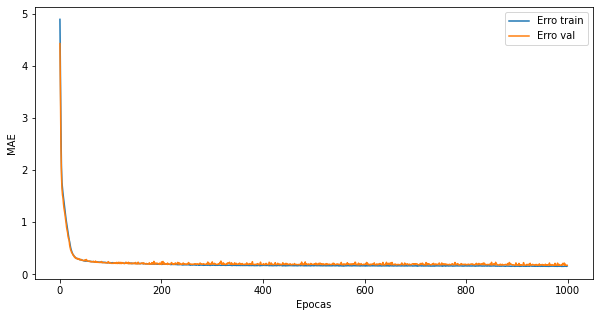

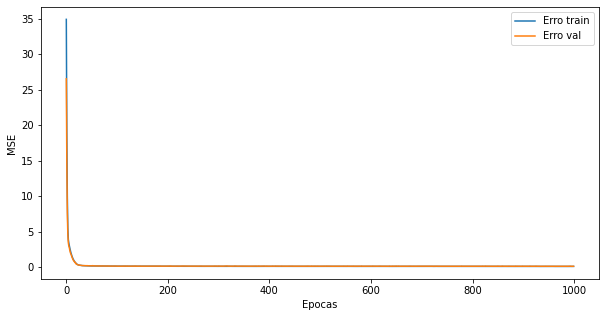

In [86]:
def plota_historico(hist):
    h = pd.DataFrame(hist.history)
    h['epoch'] = hist.epoch

    plt.figure(figsize=(10,5))
    plt.xlabel("Epocas")
    plt.ylabel("MAE")
    plt.plot(h['epoch'],h['mae'],label='Erro train')
    plt.legend(loc='best')

    plt.plot(h['epoch'],h['val_mae'],label='Erro val')
    plt.legend(loc='best')

    plt.figure(figsize=(10,5))
    plt.xlabel("Epocas")
    plt.ylabel("MSE")
    plt.plot(h['epoch'],h['mse'],label='Erro train')
    plt.legend(loc='best')

    plt.plot(h['epoch'],h['val_mse'],label='Erro val')
    plt.legend(loc='best')

    plt.show()
plota_historico(history)



----------------------------------------------------------------------------------------------------
----------------

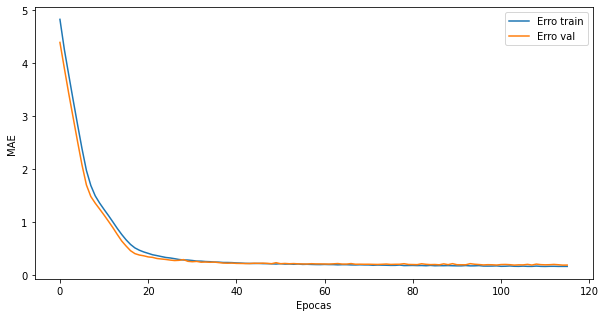

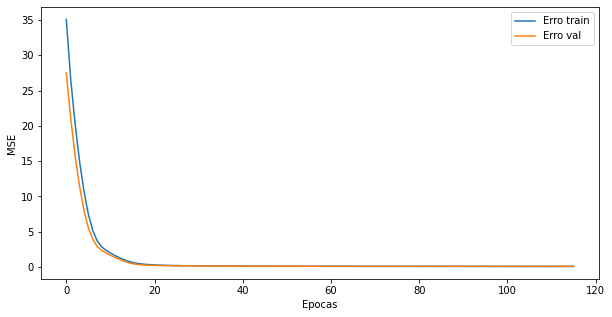

In [87]:
model = constroi_modelo()

early_stop  = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history =model.fit(
    x = normed_train_data,
    y = trains_labels,
    epochs =EPOCHS,
    validation_split = 0.2,
    verbose = 0,
    callbacks = [early_stop,MostraPragresso()]
)



plota_historico(history)

In [88]:
history.history


{'loss': [35.089900970458984,
  26.540822982788086,
  20.28675079345703,
  15.001081466674805,
  10.749494552612305,
  7.475359916687012,
  5.182231426239014,
  3.7064692974090576,
  2.868220806121826,
  2.37563419342041,
  1.9837526082992554,
  1.64677095413208,
  1.3351908922195435,
  1.0581748485565186,
  0.8336800336837769,
  0.6576505899429321,
  0.5286408066749573,
  0.43641072511672974,
  0.37881267070770264,
  0.33658653497695923,
  0.3004435896873474,
  0.2732033431529999,
  0.2534201443195343,
  0.2367721050977707,
  0.2212359756231308,
  0.21371090412139893,
  0.20037637650966644,
  0.18834471702575684,
  0.1818210333585739,
  0.1775718480348587,
  0.1723545789718628,
  0.1622936725616455,
  0.1628640741109848,
  0.15711316466331482,
  0.1562211811542511,
  0.1461571455001831,
  0.1466350555419922,
  0.139017254114151,
  0.1402527093887329,
  0.1408666968345642,
  0.13381123542785645,
  0.12966254353523254,
  0.1283569186925888,
  0.1265915185213089,
  0.1252063810825348,
  

In [89]:
loss,mae,mse  = model.evaluate(normed_test_data, test_labels, verbose=2)

print(
    '\n MAE {:5.2f} MPG'.format(mae))



5/5 - 0s - loss: 0.1260 - mae: 0.2047 - mse: 0.1260 - 30ms/epoch - 6ms/step

 MAE  0.20 MPG


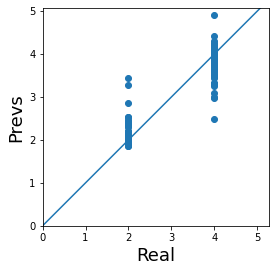

In [90]:
prev_test  =model.predict(normed_test_data).flatten()

plt.scatter(test_labels,prev_test)
plt.xlabel('Real', fontsize=18)
plt.ylabel('Prevs', fontsize=18)
plt.axis('equal')
plt.axis('square')

plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])

_= plt.plot( [-100,100],[-100,100])

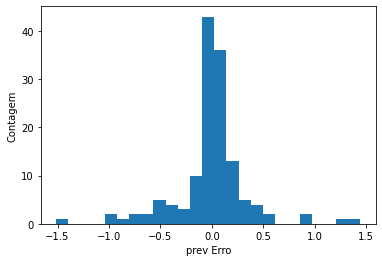

In [91]:
erro = prev_test -test_labels

plt.hist(erro,bins=25)
plt.xlabel('prev Erro')
plt.ylabel('Contagem')
plt.show()

C:\Users\Bielt\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


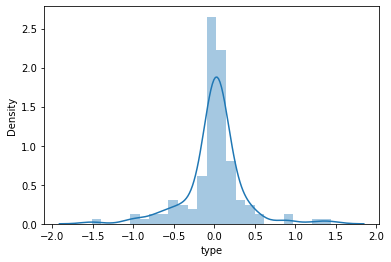

In [92]:
sns.distplot(a=erro,bins=25)
plt.show()

In [93]:
erro

9      0.118695
11    -0.028248
19     0.116609
24     0.005988
29    -0.034726
         ...   
668   -0.674878
677    0.001138
683    0.004473
689    0.320247
692    0.011632
Name: type, Length: 137, dtype: float64